# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: AmirMahdi Zeighami
2.   Student Number: 401301316


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
#import termios
#from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

Because i used Windows OS for this homework, i commented google.colab import!

In [2]:
# Change the address as you wish
plays = pd.read_csv('./data/user_artists.dat', sep='\t')
artists = pd.read_csv('./data/artists.dat', sep='\t', usecols=['id','name'])

# Preprocessing (20 pts)

In [3]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################
ap = artists.merge(plays, left_on = "id", right_on = "artistID")


In [4]:
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [5]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})
ap

,id,name,userID,artistID,playCount
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [6]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################
del ap["id"]
ap = ap.reset_index(drop = True)
ap
#TODO

,name,userID,artistID,playCount
0,MALICE MIZER,34,1,212
1,MALICE MIZER,274,1,483
2,MALICE MIZER,785,1,76
3,Diary of Dreams,135,2,1021
4,Diary of Dreams,257,2,152
...,...,...,...,...
92829,Diamanda Galás,454,18741,301
92830,Aya RL,454,18742,294
92831,Coptic Rain,454,18743,287
92832,Oz Alchemist,454,18744,286


In [9]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################


artist_rank = pd.DataFrame(columns = ['totalUniqueUsers', 'totalArtistPlays', 'avgUserPlays'])# Your Code
totalArtistPlays = (ap.groupby('name').sum().sort_values(by = 'playCount', ascending = False).apply(lambda  x: x))
#artist_rank['name'] = totalArtistPlays['name']
totalUniqueUsers = ap['name'].value_counts()
artist_rank['totalArtistPlays'] = totalArtistPlays['playCount']
artist_rank['totalUniqueUsers'] = totalUniqueUsers
artist_rank['avgUserPlays'] = artist_rank['totalArtistPlays'] / artist_rank['totalUniqueUsers']


In [10]:
artist_rank

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
Morris,1,1,1.000000
Eddie Kendricks,1,1,1.000000
Excess Pressure,1,1,1.000000


In [11]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################
ap = ap.merge(artist_rank, on=['name']).sort_values(by = 'playCount', ascending = False)

#ap = #TODO

In [12]:
ap

,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,Thalía,2071,792,324663,26,350035,13462.884615
27302,U2,1094,511,320725,185,493024,2664.994595
8152,Blur,1905,203,257978,114,318221,2791.412281
26670,Paramore,1664,498,227829,399,963449,2414.659148
...,...,...,...,...,...,...,...
38688,Destiny's Child,1810,913,1,83,34746,418.626506
32955,Sia,1290,697,1,56,27597,492.803571
71811,Chris Spheeris,510,4988,1,5,3106,621.200000
91319,Haylie Duff,1851,17080,1,1,1,1.000000


# Exploration

In [13]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x = x[:20], y = y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

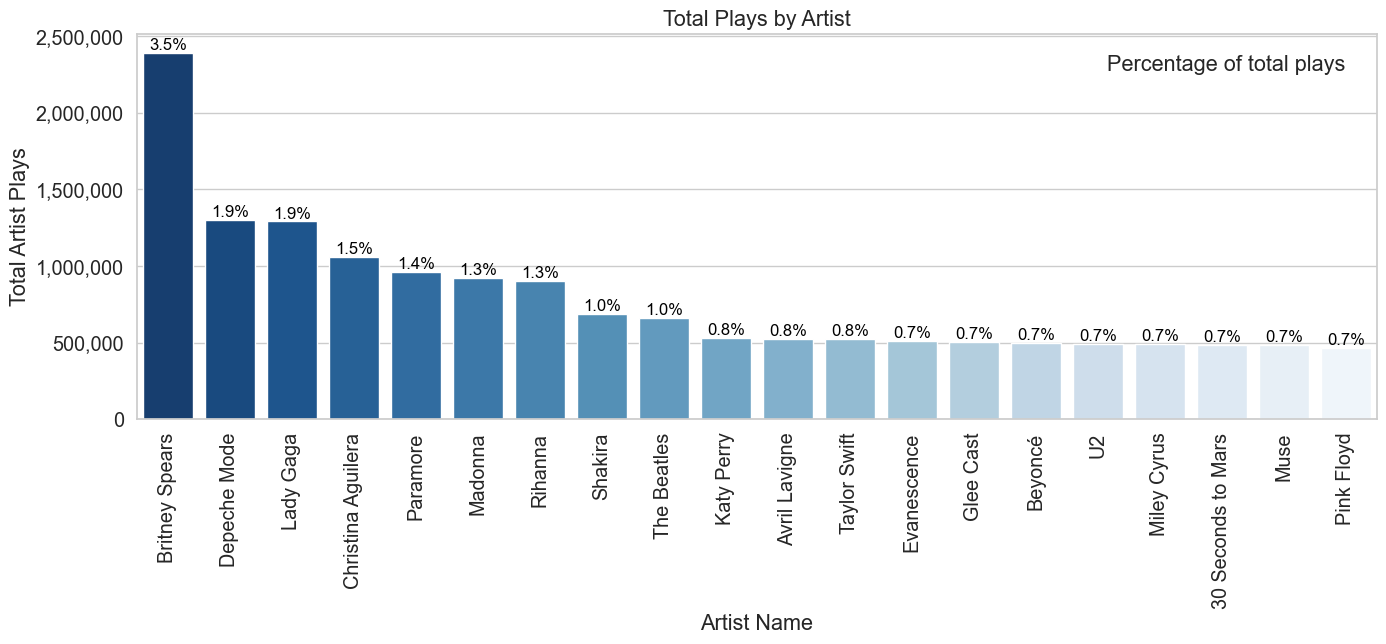

In [14]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

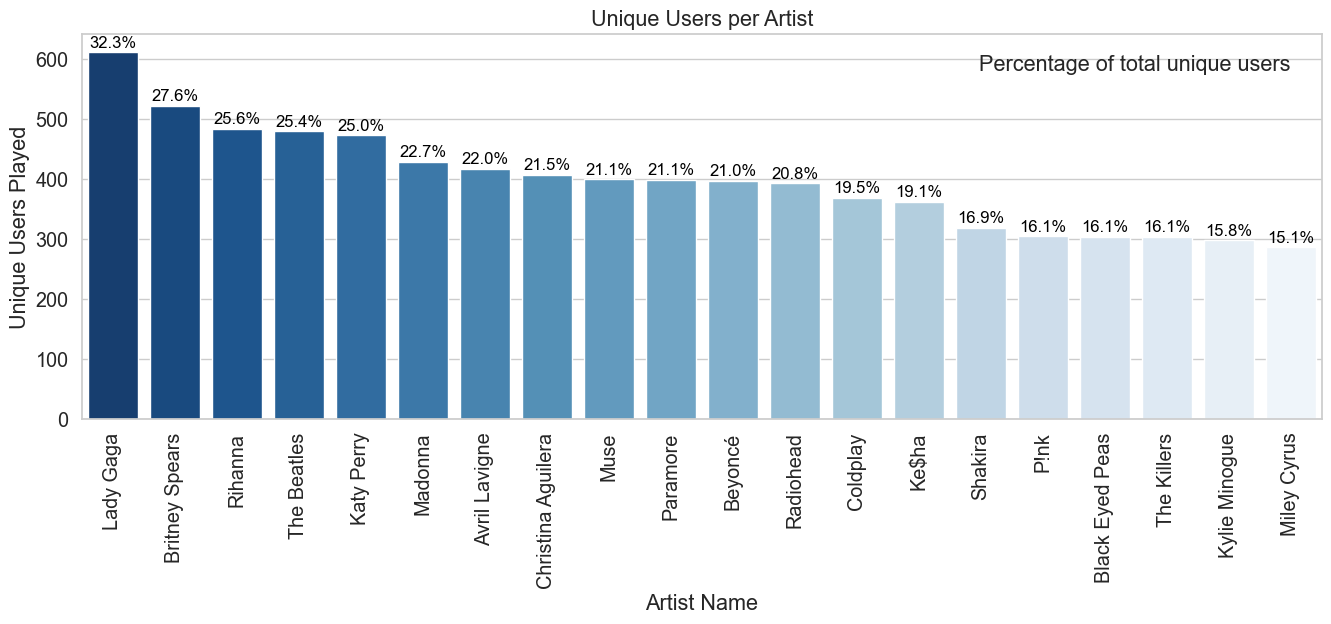

In [15]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

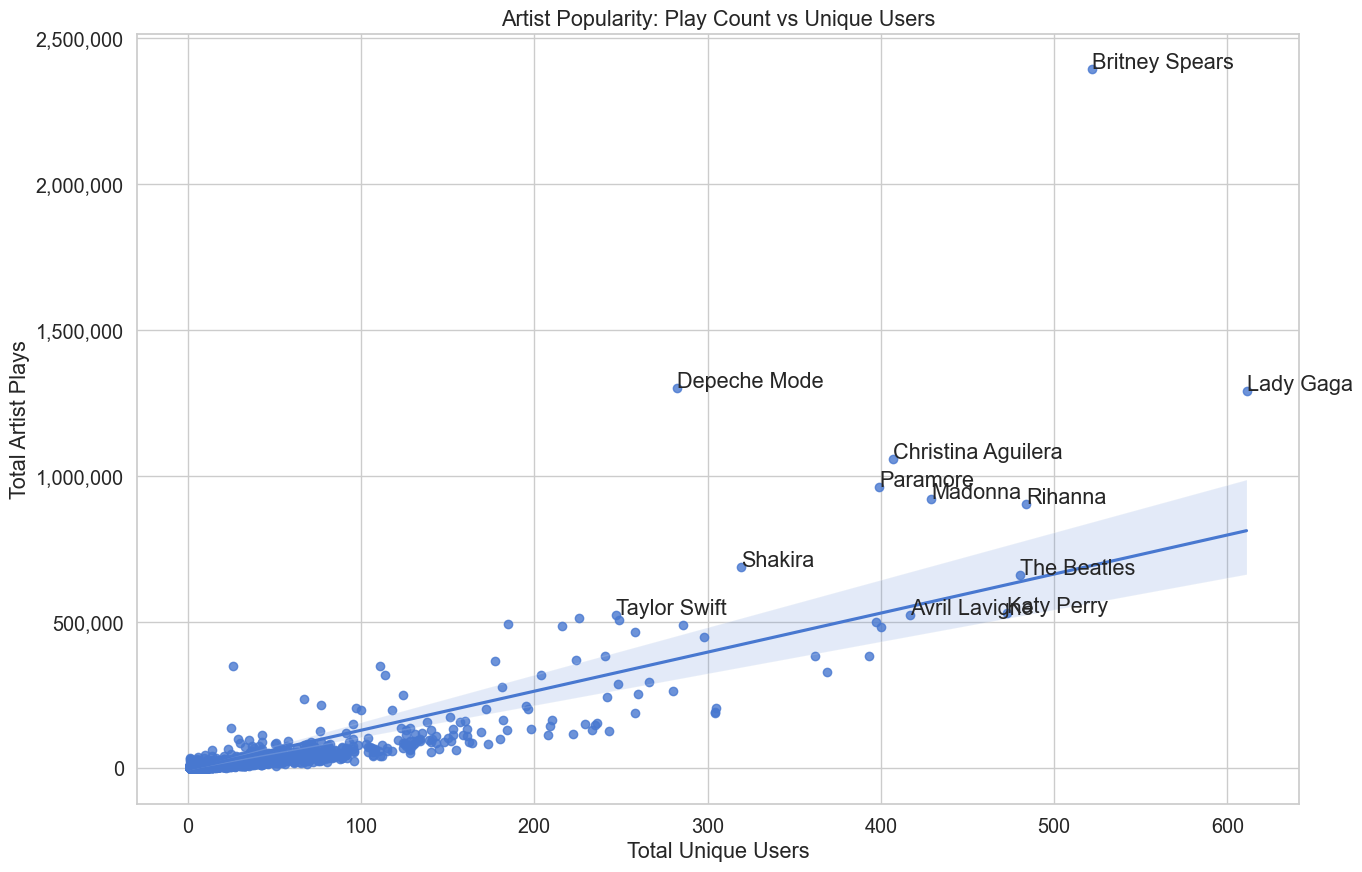

In [16]:
top_artists =  artist_rank.nlargest(12, ['totalArtistPlays']).index# TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"

x = artist_rank.totalUniqueUsers# TODO : "totalUniqueUsers" of "artist_rank"
y = artist_rank.totalArtistPlays # TODO :  "totalArtistPlays" of "artist_rank"
labels = artist_rank.index # TODO : index of "artist_rank"

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x = x,y = y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))


# Preprocessing (30 pts)

In [17]:
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)
ap

,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays,playCountScaled
2800,Depeche Mode,1642,72,352698,282,1301308,4614.567376,1.000000
35843,Thalía,2071,792,324663,26,350035,13462.884615,0.920513
27302,U2,1094,511,320725,185,493024,2664.994595,0.909347
8152,Blur,1905,203,257978,114,318221,2791.412281,0.731441
26670,Paramore,1664,498,227829,399,963449,2414.659148,0.645960
...,...,...,...,...,...,...,...,...
38688,Destiny's Child,1810,913,1,83,34746,418.626506,0.000000
32955,Sia,1290,697,1,56,27597,492.803571,0.000000
71811,Chris Spheeris,510,4988,1,5,3106,621.200000,0.000000
91319,Haylie Duff,1851,17080,1,1,1,1.000000,0.000000


In [18]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################

ratings_df = pd.DataFrame(index = sorted(ap.userID.unique()), columns = sorted(ap.artistID.unique()))# Your Code
ratings_df.index.name = 'userID'
ratings_df.columns.name = 'artistID'
for i in ap.index:
    ratings_df[ap['artistID'][i]][ap['userID'][i]] = ap['playCountScaled'][i]
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ratings_df

In [19]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################
ratings = ratings_df.replace(np.nan, 0).to_numpy()# Your Code
ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00115397, ..., 0.        , 0.        ,
        0.        ]])

I think that your definition of Sparsity is a little bit different than mine. (sparsity = number of zeros / total) but i implemented yours!

In [21]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code

nObserved = (ratings == 0).sum().sum()
nTotal    = ratings.shape[0] * ratings.shape[1]
sparsity  = nObserved / nTotal * 100
print(sparsity, '%')

## END

99.72362497745786 %


# Fitting(Training) Model (50pts)

In [22]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################
       
def train_test_split(ratings):
 
    # TODO
    size = ratings.shape
    shape = round(size[0]/2)
    train = np.copy(ratings)
    validation = np.zeros(train.shape)
    for i in range(train.shape[0]):
        nUserRatings = (train[i]!=0).sum()
        if(nUserRatings >= MIN_USER_RATINGS):
            nUserRatings = (train[i] != 0).sum()
            index = np.where(train[i] != 0)
            index = index[0][:]      
            randomMask = np.random.choice(index, DELETE_RATING_COUNT, replace = False)
            validation[i][randomMask] = train[i][randomMask]
            train[i][randomMask] = 0
    return train, validation


In [23]:
train, val = train_test_split(ratings)


In [24]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################


def rmse(prediction, ground_truth):
    prediction = np.array(prediction[ground_truth != 0]).reshape(-1, 1)# TODO
    ground_truth = np.array(ground_truth[ground_truth != 0]).reshape(-1, 1)# TODO
    return sqrt(mean_squared_error(prediction, ground_truth))


In [57]:
class Recommender:
  
  def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
  
  def predictions(self, P, Q):
    #TODO : create the prediction matrix
    return np.dot(P, Q.T)
  def fit(self, X_train, X_val):
    #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
    #TODO : save the loss on train and validation data in each iteration
    self.P = np.random.normal(0.1, 0.1, (X_train.shape[0], self.n_latent_features))
    self.Q = np.random.normal(0.1, 0.1, (X_train.shape[1], self.n_latent_features))

    rowObserved = np.where(X_train != 0)[0]
    colObserved = np.where(X_train != 0)[1]
    rateObserved = X_train[rowObserved, colObserved]
    nObserved = rowObserved.shape[0]
    
    self.trainError = np.zeros((self.n_epochs, 1))
    self.validationError = np.zeros((self.n_epochs, 1))
    
    for epoch in range(self.n_epochs):
        for i in range(nObserved):
            e = rateObserved[i] - np.dot(self.P[rowObserved[i]], self.Q[colObserved[i]]).sum()
            self.P[rowObserved[i]] += self.learning_rate * (e * self.Q[colObserved[i]] - self.lmbda * self.P[rowObserved[i]])
            self.Q[colObserved[i]] += self.learning_rate * (e * self.P[rowObserved[i]] - self.lmbda * self.Q[colObserved[i]])
        self.predictedRatings = self.predictions(self.P, self.Q)
        self.trainError[epoch] = rmse(self.predictedRatings, X_train)
        self.validationError[epoch] = rmse(self.predictedRatings, X_val)
        print(f"Epoch : {epoch} - \ttrainError : {self.trainError[epoch]} - \tValidationError : {self.validationError[epoch]}")
    return self

  def predict(self, X_train, user_index):
    #TODO : return predicted ratings for unobserved values of specific user index
        return self.predictedRatings[user_index][train[user_index][:] == 0]

In [58]:
#creating recommender object
recommender = Recommender().fit(train, val)


Epoch : 0 - 	trainError : [0.04260043] - 	ValidationError : [0.04303673]
Epoch : 1 - 	trainError : [0.04207113] - 	ValidationError : [0.0425204]
Epoch : 2 - 	trainError : [0.04156157] - 	ValidationError : [0.04202379]
Epoch : 3 - 	trainError : [0.04107056] - 	ValidationError : [0.04154565]
Epoch : 4 - 	trainError : [0.04059695] - 	ValidationError : [0.04108484]
Epoch : 5 - 	trainError : [0.04013972] - 	ValidationError : [0.0406403]
Epoch : 6 - 	trainError : [0.03969789] - 	ValidationError : [0.04021106]
Epoch : 7 - 	trainError : [0.03927057] - 	ValidationError : [0.0397962]
Epoch : 8 - 	trainError : [0.03885692] - 	ValidationError : [0.03939488]
Epoch : 9 - 	trainError : [0.03845618] - 	ValidationError : [0.03900632]
Epoch : 10 - 	trainError : [0.03806762] - 	ValidationError : [0.03862979]
Epoch : 11 - 	trainError : [0.03769058] - 	ValidationError : [0.03826463]
Epoch : 12 - 	trainError : [0.03732444] - 	ValidationError : [0.0379102]
Epoch : 13 - 	trainError : [0.03696861] - 	Validatio

Epoch : 112 - 	trainError : [0.02042066] - 	ValidationError : [0.02159954]
Epoch : 113 - 	trainError : [0.02033261] - 	ValidationError : [0.02151443]
Epoch : 114 - 	trainError : [0.02024537] - 	ValidationError : [0.02143009]
Epoch : 115 - 	trainError : [0.02015892] - 	ValidationError : [0.02134651]
Epoch : 116 - 	trainError : [0.02007326] - 	ValidationError : [0.0212637]
Epoch : 117 - 	trainError : [0.01998837] - 	ValidationError : [0.02118163]
Epoch : 118 - 	trainError : [0.01990425] - 	ValidationError : [0.02110031]
Epoch : 119 - 	trainError : [0.0198209] - 	ValidationError : [0.02101972]
Epoch : 120 - 	trainError : [0.01973829] - 	ValidationError : [0.02093986]
Epoch : 121 - 	trainError : [0.01965643] - 	ValidationError : [0.02086071]
Epoch : 122 - 	trainError : [0.0195753] - 	ValidationError : [0.02078227]
Epoch : 123 - 	trainError : [0.01949489] - 	ValidationError : [0.02070454]
Epoch : 124 - 	trainError : [0.01941521] - 	ValidationError : [0.02062749]
Epoch : 125 - 	trainError : 

دقت این مدل بسیار به مقدار اولیه ضرایب وابسته است و با تغییر واریانس توزیع گوسی برای مقدار اولیه، مقدار خطا بهتر یا بدتر می شود.

Text(0, 0.5, 'Error')

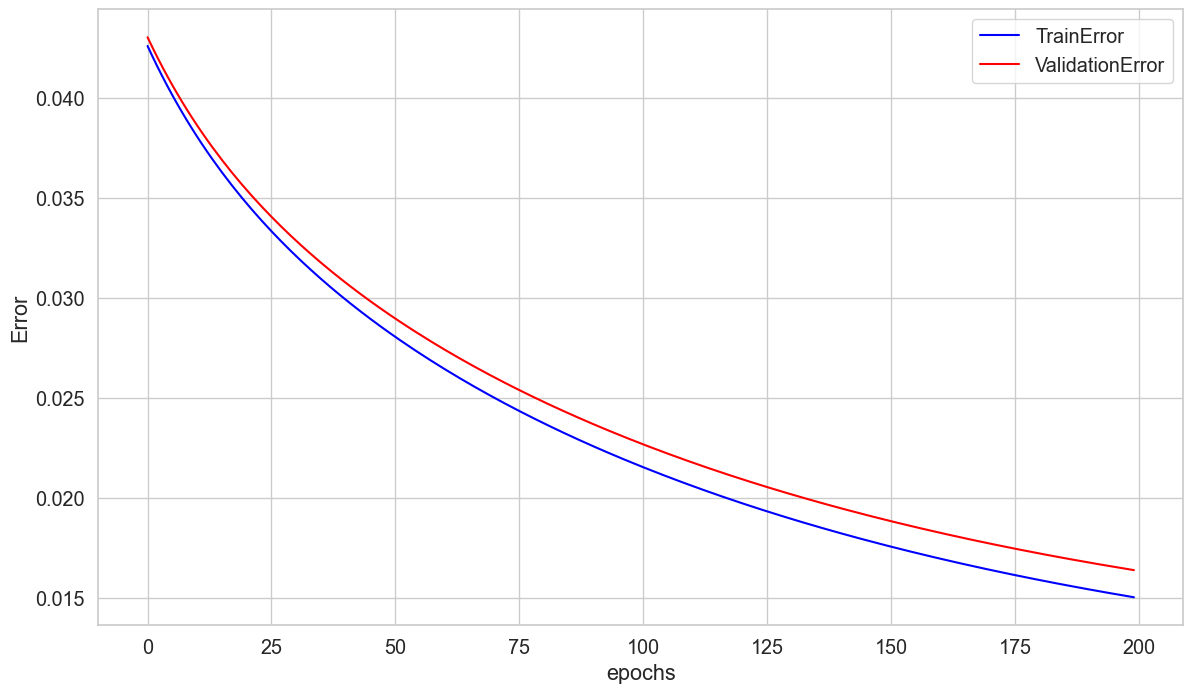

In [59]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(recommender.trainError, color = 'blue')
ax.plot(recommender.validationError, color = 'red')
ax.legend(['TrainError', 'ValidationError'])
plt.xlabel('epochs')
plt.ylabel('Error')
#TODO

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

# Making recommendations

In [60]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)

In [61]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
  artist_ids = ratings_df.columns[artists_index]

  artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
  top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
  artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
  artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
  return artist_recommendations.sort_values("rating", ascending=False)

In [62]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

,id,name,rating
0,7,Marilyn Manson,0.196486
1,472,3 Doors Down,0.043204
2,614,Pearl Jam,0.042016
3,923,Children of Bodom,0.025657
4,978,Disturbed,0.021690
5,1104,Rammstein,0.021562
6,1118,A Perfect Circle,0.020879
7,2172,Gojira,0.017051
8,6257,Rob Zombie,0.016280
9,6618,D12,0.010990


In [64]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:

create_artist_ratings(artists, predictions_index, rating_predictions)


,id,name,rating
0,1161,Pizzicato Five,0.070683
1,3361,Bearbot,0.068576
2,3569,Jay Brannan,0.067753
3,6262,Girls Can't Catch,0.064777
4,10855,Richard Gibbs,0.064743
5,12128,Gyllene Tider,0.064386
6,12453,Yahya Hawwa,0.063635
7,12629,The Human Project,0.063052
8,16972,Sleetgrout,0.062622
9,18465,Mokoma,0.062374


# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**